# Description
This notebook will contain implementation of two clustering, and four dimensionality (3 linear, and one non-linear) algorithms.

Clustering:
- Expectation Maximization
- Clustering Algorithm of Your Choice

Dimensionality (Linear)
- PCA
- ICA
- Randomized Projections

Dimensionality (Non-Linear)
- Manifold Learning Algorithm of Your Choice


## Step 1: Obtaining and Cleaning the Bank Churners data.

Number of entries: 10127
Number of features: 5


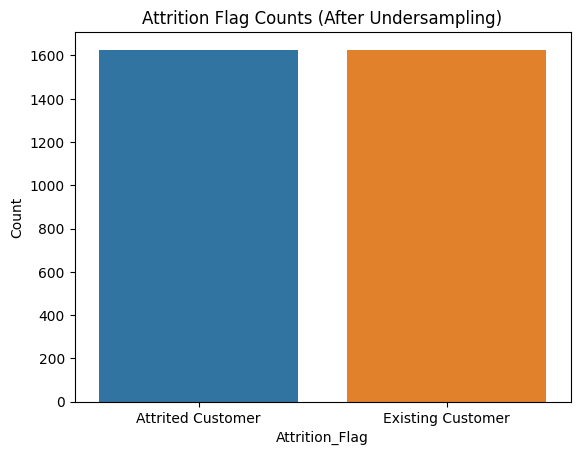

Attrition_Flag
Attrited Customer    1627
Existing Customer    1627
Name: count, dtype: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import constants
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
np.random.seed(26)

# Load the dataset
data = pd.read_csv('./datasets/BankChurners.csv')
dataset = "Bank Churners"

# Define the target column and set random_state
target_column = 'Attrition_Flag'

# List of categorical columns to keep
columns_to_keep = ["Customer_Age", "Gender", "Education_Level", "Marital_Status", "Income_Category"]

# Drop all other categorical columns
X = data[columns_to_keep]
y = data[target_column]

num_entries = data.shape[0]
print("Number of entries:", num_entries)
num_features = X.shape[1]
print("Number of features:", num_features)

# Encode categorical features using one-hot encoding
categorical_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=constants.CV)
X_resampled, y_resampled = undersampler.fit_resample(X_encoded, y)

sns.countplot(data=pd.DataFrame({'Attrition_Flag': y_resampled}), x='Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')
plt.title('Attrition Flag Counts (After Undersampling)')
plt.show()

counts = pd.Series(y_resampled).value_counts()

# Now 'counts' contains the counts of each category ('Existing Customer' and 'Attrited Customer')
print(counts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=constants.TEST_SIZE, random_state=constants.RANDOM_STATE)


## Scaling
Run Scaling for the data to be used in the SVM, NN, and kNN. These are algorithms which always benefit from scaling the data.

In [2]:
from sklearn.preprocessing import StandardScaler

# We need to scale the data before we pass it to the SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Algorithm 1: Expectation Maximization (EM)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


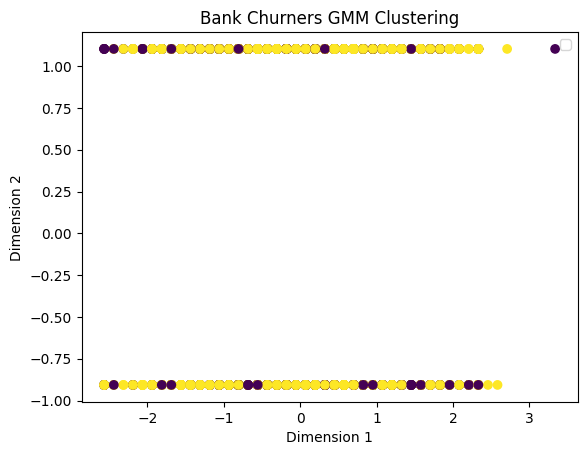

In [9]:
from algorithms import gmm, plot_clustering

title = f"{dataset} GMM Clustering"
n_components = 2

gmm, gmm_labels = gmm(X_train_scaled, n_components)
plot_clustering(X_train_scaled, gmm_labels, title=title)


### Algorithm 2: K-Means Clustering

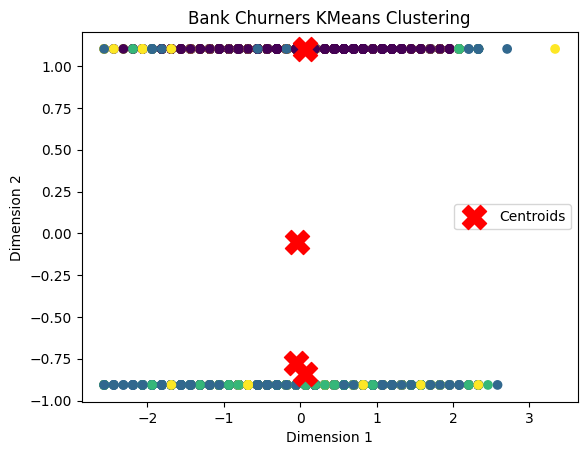

In [4]:
from algorithms import kmeans

n_clusters = 4
title = f"{dataset} KMeans Clustering"

kmeans, kmeans_labels = kmeans(X_train_scaled, n_clusters)
plot_clustering(X_train_scaled, kmeans_labels, kmeans.cluster_centers_, title)


### Algorithm 3: PCA

Explained Variance per component: [0.13091659 0.10858822]
Total Explained Variance (first n components): 0.23950480710073735


/Users/ans/Desktop/ML/MachineLearning/DimensionalityReduction/algorithms.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


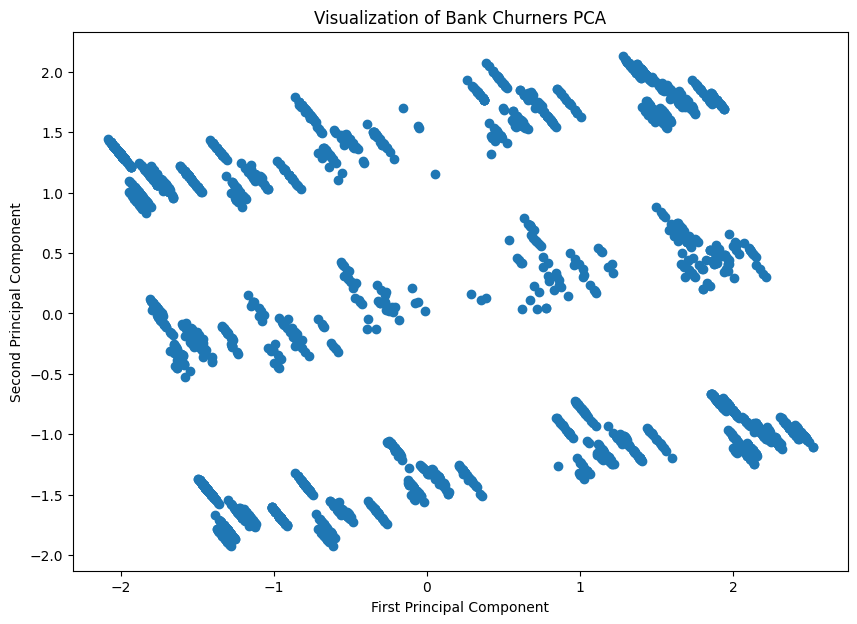

In [5]:
from algorithms import plot_dr_algorithm, pca

title = f"{dataset} PCA"
n_components = 2
X_pca = pca(X_train_scaled, n_components)
plot_dr_algorithm(X_pca, title, n_components)


### Algorithm 4: ICA

/Users/ans/Desktop/ML/MachineLearning/DimensionalityReduction/algorithms.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


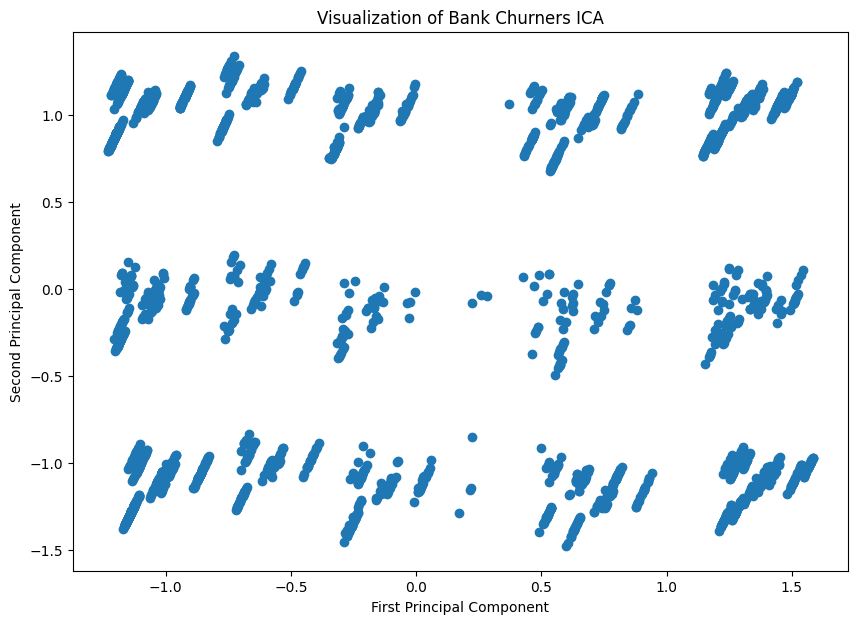

In [6]:
from algorithms import ica, plot_dr_algorithm

title= f"{dataset} ICA"
n_components =2

X_ica = ica(X_train_scaled, n_components)
plot_dr_algorithm(X_ica, title, n_components)

### Algorithm 5: Randomized Projection

/Users/ans/Desktop/ML/MachineLearning/DimensionalityReduction/algorithms.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


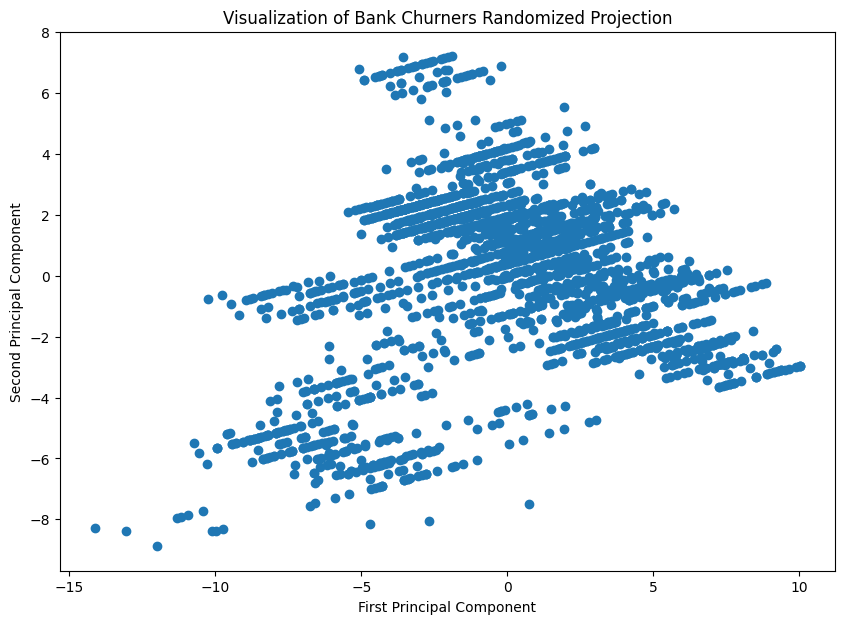

In [7]:
from algorithms import randomized_projection, plot_dr_algorithm

title=f"{dataset} Randomized Projection"
n_components=2

X_rp = randomized_projection(X_train_scaled, n_components=2)
plot_dr_algorithm(X_rp, title, n_components)


### Algorithm 6: Manifold

/Users/ans/Desktop/ML/MachineLearning/DimensionalityReduction/algorithms.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


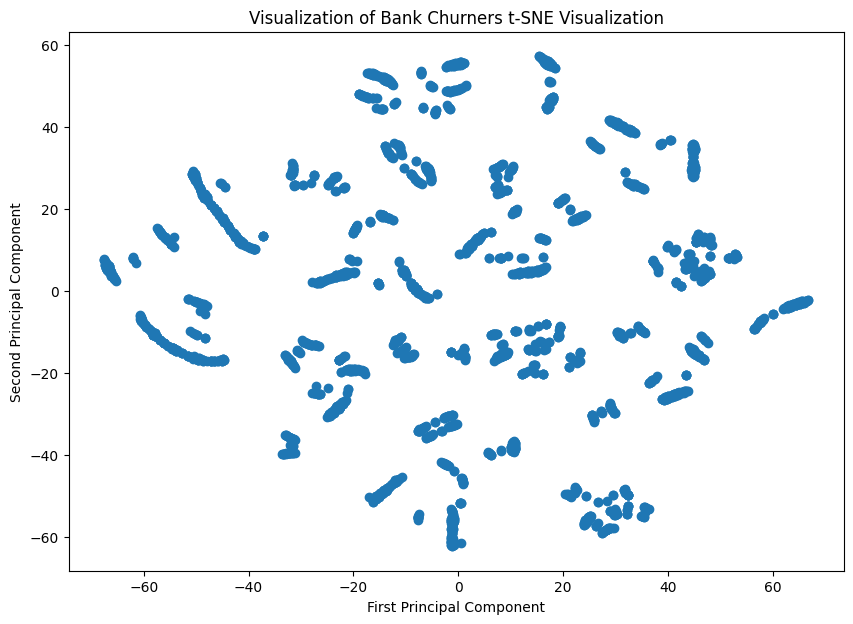

In [10]:
from algorithms import tsne, plot_dr_algorithm

title=f"{dataset} t-SNE Visualization"

# Perform t-SNE
embedded_data = tsne(X_train_scaled, n_components=2)

# Plot the results
plot_dr_algorithm(embedded_data, title=title)
